### Logistic Regression Titanic

<li> Goal is to build a model with AUC >=.8

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [4]:
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

### First choice of variables for Logistic Regression
Looking at the data the information sex, age, pclass, sibsp, parch, fare, and embarked are the only variable that can easily be used as either a continuous or categorical variable

In [5]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
X['fare'] = df['Fare']
X['survived'] = df['Survived']
X['embarked'] = df['Embarked']

In [6]:
X

,sex,age,pclass,sibsp,parch,fare,survived,embarked
0,male,22,3,1,0,7.2500,0,S
1,female,38,1,1,0,71.2833,1,C
2,female,26,3,0,0,7.9250,1,S
3,female,35,1,1,0,53.1000,1,S
4,male,35,3,0,0,8.0500,0,S
5,male,NaN,3,0,0,8.4583,0,Q
6,male,54,1,0,0,51.8625,0,S
7,male,2,3,3,1,21.0750,0,S
8,female,27,3,0,2,11.1333,1,S
9,female,14,2,1,0,30.0708,1,C


### First Look
<li>Survived will be dropped as the dependent variable
<li>Sex and Embarked values will need to be replaced with 1 and 0
<li>Age values need to cleaned to either remove NaN values of replace with an avg


### Data Clean
<li> Age will be averaged

In [7]:
#dependant variable
y = X['survived']
X = X.drop(['survived'], axis=1)

In [8]:
pd.get_dummies(X.sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [9]:
#removing one gender to prevent colinear variables
X['sex'] = pd.get_dummies(X.sex)['female']

In [10]:
avgAge = X['age'].mean()
X['age'] = X['age'].fillna(avgAge)

In [11]:
#replaced Embarked variables with 1 for positive and 0 for negative
#one of the embarked columns must be droped to prevent perfect colinear variables
X = X.join(pd.get_dummies(X.embarked))
X = X.drop(['embarked','C'], axis=1)
X

,sex,age,pclass,sibsp,parch,fare,Q,S
0,0,22.000000,3,1,0,7.2500,0,1
1,1,38.000000,1,1,0,71.2833,0,0
2,1,26.000000,3,0,0,7.9250,0,1
3,1,35.000000,1,1,0,53.1000,0,1
4,0,35.000000,3,0,0,8.0500,0,1
5,0,29.699118,3,0,0,8.4583,1,0
6,0,54.000000,1,0,0,51.8625,0,1
7,0,2.000000,3,3,1,21.0750,0,1
8,1,27.000000,3,0,2,11.1333,0,1
9,1,14.000000,2,1,0,30.0708,0,0


In [12]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state= 42)

In [13]:
def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y
y_base_rate = base_rate_model (X_test)
from sklearn.metrics import accuracy_score
print "Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate)

Base rate accuracy is 0.59


In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty= 'l2', C=1)
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
print "Base rate accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test))

Base rate accuracy is 0.81


In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [17]:
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.80
             precision    recall  f1-score   support

          0       0.83      0.86      0.84       105
          1       0.79      0.74      0.76        74

avg / total       0.81      0.81      0.81       179



### Results
<li> AUC = .80
<li> can we improve?

In [18]:
X = pd.DataFrame()
#X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
X['fare'] = df['Fare']
X['survived'] = df['Survived']
X['embarked'] = df['Embarked']
y = X['survived']
X = X.drop(['survived'], axis=1)
#X['sex'] = pd.get_dummies(X.sex)['female']
avgAge = X['age'].mean()
X['age'] = X['age'].fillna(avgAge)
X = X.join(pd.get_dummies(X.embarked))
X = X.drop(['embarked','C'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state= 42)
model = LogisticRegression(penalty= 'l2', C=1)
model.fit(X_train, y_train)
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.69
             precision    recall  f1-score   support

          0       0.71      0.88      0.79       105
          1       0.74      0.50      0.60        74

avg / total       0.72      0.72      0.71       179



### Sex
<li> large drop in AUC .11
<li> Very important

In [19]:
X = pd.DataFrame()
X['sex'] = df['Sex']
#X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
X['fare'] = df['Fare']
X['survived'] = df['Survived']
X['embarked'] = df['Embarked']
y = X['survived']
X = X.drop(['survived'], axis=1)
X['sex'] = pd.get_dummies(X.sex)['female']
#avgAge = X['age'].mean()
#X['age'] = X['age'].fillna(avgAge)
X = X.join(pd.get_dummies(X.embarked))
X = X.drop(['embarked','C'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state= 42)
model = LogisticRegression(penalty= 'l2', C=1)
model.fit(X_train, y_train)
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.76
             precision    recall  f1-score   support

          0       0.81      0.79      0.80       105
          1       0.71      0.73      0.72        74

avg / total       0.77      0.77      0.77       179



### Age
<li> .04 drop in AUC
<li> Important

In [20]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
X['fare'] = df['Fare']
X['survived'] = df['Survived']
X['embarked'] = df['Embarked']
X = X.dropna(axis=0)
y = X['survived']
X = X.drop(['survived'], axis=1)
X['sex'] = pd.get_dummies(X.sex)['female']
#avgAge = X['age'].mean()
#X['age'] = X['age'].fillna(avgAge)
X = X.join(pd.get_dummies(X.embarked))
X = X.drop(['embarked','C'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state= 42)
model = LogisticRegression(penalty= 'l2', C=1)
model.fit(X_train, y_train)
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.78
             precision    recall  f1-score   support

          0       0.77      0.91      0.83        80
          1       0.85      0.65      0.74        63

avg / total       0.81      0.80      0.79       143



### Age
<li> Droping NaN Age 
<li> .02 Drop in AUC

In [21]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
#X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
X['fare'] = df['Fare']
X['survived'] = df['Survived']
X['embarked'] = df['Embarked']
y = X['survived']
X = X.drop(['survived'], axis=1)
X['sex'] = pd.get_dummies(X.sex)['female']
avgAge = X['age'].mean()
X['age'] = X['age'].fillna(avgAge)
X = X.join(pd.get_dummies(X.embarked))
X = X.drop(['embarked','C'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state= 42)
model = LogisticRegression(penalty= 'l2', C=1)
model.fit(X_train, y_train)
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.77
             precision    recall  f1-score   support

          0       0.80      0.86      0.83       105
          1       0.77      0.69      0.73        74

avg / total       0.79      0.79      0.79       179



### Pclass
<li> .03 Drop in AUC
<li> Important

In [22]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
#X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
X['fare'] = df['Fare']
X['survived'] = df['Survived']
X['embarked'] = df['Embarked']
y = X['survived']
X = X.drop(['survived'], axis=1)
X['sex'] = pd.get_dummies(X.sex)['female']
avgAge = X['age'].mean()
X['age'] = X['age'].fillna(avgAge)
X = X.join(pd.get_dummies(X.embarked))
X = X.drop(['embarked','C'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state= 42)
model = LogisticRegression(penalty= 'l2', C=1)
model.fit(X_train, y_train)
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.79
             precision    recall  f1-score   support

          0       0.82      0.85      0.83       105
          1       0.77      0.73      0.75        74

avg / total       0.80      0.80      0.80       179



### SibSp
<li> .01 Drop in AUC
<li> Small Impact

In [23]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
#X['parch'] = df['Parch']
X['fare'] = df['Fare']
X['survived'] = df['Survived']
X['embarked'] = df['Embarked']
y = X['survived']
X = X.drop(['survived'], axis=1)
X['sex'] = pd.get_dummies(X.sex)['female']
avgAge = X['age'].mean()
X['age'] = X['age'].fillna(avgAge)
X = X.join(pd.get_dummies(X.embarked))
X = X.drop(['embarked','C'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state= 42)
model = LogisticRegression(penalty= 'l2', C=1)
model.fit(X_train, y_train)
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.79
             precision    recall  f1-score   support

          0       0.82      0.84      0.83       105
          1       0.76      0.74      0.75        74

avg / total       0.80      0.80      0.80       179



### Parch
<li> .01 Drop in AUC
<li> Small Impact

In [24]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
#X['fare'] = df['Fare']
X['survived'] = df['Survived']
X['embarked'] = df['Embarked']
y = X['survived']
X = X.drop(['survived'], axis=1)
X['sex'] = pd.get_dummies(X.sex)['female']
avgAge = X['age'].mean()
X['age'] = X['age'].fillna(avgAge)
X = X.join(pd.get_dummies(X.embarked))
X = X.drop(['embarked','C'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state= 42)
model = LogisticRegression(penalty= 'l2', C=1)
model.fit(X_train, y_train)
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.80
             precision    recall  f1-score   support

          0       0.82      0.85      0.84       105
          1       0.77      0.74      0.76        74

avg / total       0.80      0.80      0.80       179



### Fare
<li>.0 Drop in AUC
<li> negligible

In [25]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
X['fare'] = df['Fare']
X['survived'] = df['Survived']
#X['embarked'] = df['Embarked']
y = X['survived']
X = X.drop(['survived'], axis=1)
X['sex'] = pd.get_dummies(X.sex)['female']
avgAge = X['age'].mean()
X['age'] = X['age'].fillna(avgAge)
#X = X.join(pd.get_dummies(X.embarked))
#X = X.drop(['embarked','C'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state= 42)
model = LogisticRegression(penalty= 'l2', C=1)
model.fit(X_train, y_train)
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.79
             precision    recall  f1-score   support

          0       0.81      0.86      0.83       105
          1       0.78      0.72      0.75        74

avg / total       0.80      0.80      0.80       179



### Embarked
<li>.01 Drop in AUC
<li> Small Impact

### Improvements
<li> Drop Fares
<li> Drop combinations of Embarked, SibSp,Parch

### Bench Marks
---Logistic Model---
Logistic AUC = 0.80
             precision    recall  f1-score   support

          0       0.83      0.86      0.84       105
          1       0.79      0.74      0.76        74

    avg / total       0.81      0.81      0.81       179

---Logistic Model No Fare---
Logistic AUC = 0.80
             precision    recall  f1-score   support

          0       0.82      0.85      0.84       105
          1       0.77      0.74      0.76        74

    avg / total       0.80      0.80      0.80       179

In [26]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
#X['fare'] = df['Fare']
X['survived'] = df['Survived']
#X['embarked'] = df['Embarked']
y = X['survived']
X = X.drop(['survived'], axis=1)
X['sex'] = pd.get_dummies(X.sex)['female']
avgAge = X['age'].mean()
X['age'] = X['age'].fillna(avgAge)
#X = X.join(pd.get_dummies(X.embarked))
#X = X.drop(['embarked','C'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state= 42)
model = LogisticRegression(penalty= 'l2', C=1)
model.fit(X_train, y_train)
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.81
             precision    recall  f1-score   support

          0       0.83      0.88      0.85       105
          1       0.81      0.74      0.77        74

avg / total       0.82      0.82      0.82       179



### Drop Embarked
<li> .01 AUC improvement

In [27]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
#X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
#X['fare'] = df['Fare']
X['survived'] = df['Survived']
X['embarked'] = df['Embarked']
y = X['survived']
X = X.drop(['survived'], axis=1)
X['sex'] = pd.get_dummies(X.sex)['female']
avgAge = X['age'].mean()
X['age'] = X['age'].fillna(avgAge)
X = X.join(pd.get_dummies(X.embarked))
X = X.drop(['embarked','C'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state= 42)
model = LogisticRegression(penalty= 'l2', C=1)
model.fit(X_train, y_train)
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.79
             precision    recall  f1-score   support

          0       0.82      0.84      0.83       105
          1       0.76      0.74      0.75        74

avg / total       0.80      0.80      0.80       179



### Drop SibSp
<li> .01 AUC drop

In [28]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
#X['parch'] = df['Parch']
#X['fare'] = df['Fare']
X['survived'] = df['Survived']
X['embarked'] = df['Embarked']
y = X['survived']
X = X.drop(['survived'], axis=1)
X['sex'] = pd.get_dummies(X.sex)['female']
avgAge = X['age'].mean()
X['age'] = X['age'].fillna(avgAge)
X = X.join(pd.get_dummies(X.embarked))
X = X.drop(['embarked','C'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state= 42)
model = LogisticRegression(penalty= 'l2', C=1)
model.fit(X_train, y_train)
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.80
             precision    recall  f1-score   support

          0       0.83      0.84      0.83       105
          1       0.77      0.76      0.76        74

avg / total       0.80      0.80      0.80       179



### Drop Parch
<li> No Change in AUC

### Round 2 Results
<li> Recommend droping embarked

In [29]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
#X['parch'] = df['Parch']
#X['fare'] = df['Fare']
X['survived'] = df['Survived']
#X['embarked'] = df['Embarked']
y = X['survived']
X = X.drop(['survived'], axis=1)
X['sex'] = pd.get_dummies(X.sex)['female']
avgAge = X['age'].mean()
X['age'] = X['age'].fillna(avgAge)
#X = X.join(pd.get_dummies(X.embarked))
#X = X.drop(['embarked','C'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state= 42)
model = LogisticRegression(penalty= 'l2', C=1)
model.fit(X_train, y_train)
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.80
             precision    recall  f1-score   support

          0       0.83      0.86      0.84       105
          1       0.79      0.74      0.76        74

avg / total       0.81      0.81      0.81       179



### Drop Parch
<li> .01 Drop in AUC

In [30]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
#X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
#X['fare'] = df['Fare']
X['survived'] = df['Survived']
#X['embarked'] = df['Embarked']
y = X['survived']
X = X.drop(['survived'], axis=1)
X['sex'] = pd.get_dummies(X.sex)['female']
avgAge = X['age'].mean()
X['age'] = X['age'].fillna(avgAge)
#X = X.join(pd.get_dummies(X.embarked))
#X = X.drop(['embarked','C'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state= 42)
model = LogisticRegression(penalty= 'l2', C=1)
model.fit(X_train, y_train)
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.78
             precision    recall  f1-score   support

          0       0.81      0.87      0.83       105
          1       0.79      0.70      0.74        74

avg / total       0.80      0.80      0.80       179



### Drop SibSp
<li> .03 Drop in AUC

### Round 3 Optimal Model

In [31]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
X['survived'] = df['Survived']
y = X['survived']
X = X.drop(['survived'], axis=1)
X['sex'] = pd.get_dummies(X.sex)['female']
avgAge = X['age'].mean()
X['age'] = X['age'].fillna(avgAge)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state= 42)
model = LogisticRegression(penalty= 'l2', C=1)
model.fit(X_train, y_train)
print "\n\n---Optimal Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Optimal Logistic Model---
Logistic AUC = 0.81
             precision    recall  f1-score   support

          0       0.83      0.88      0.85       105
          1       0.81      0.74      0.77        74

avg / total       0.82      0.82      0.82       179



In [32]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

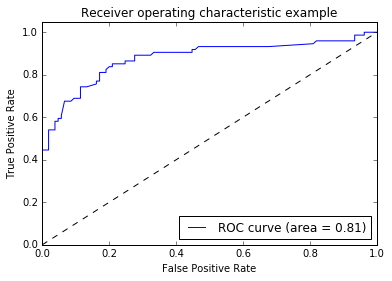

In [33]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Final Results
<li> Independent Variables: Pclass, Sex, Age, SibSp, Parch
<li> Dependent Variables: Survived
<li> AUC: .81
We found that Sex, Age, and PClass were the most importan Indepedent Variables and had the largest impact on the model.
